# Libraries

In [1]:
import tkinter as tk
from tkinter import filedialog,ttk
import cv2
from PIL import Image,ImageTk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Morphological Operations

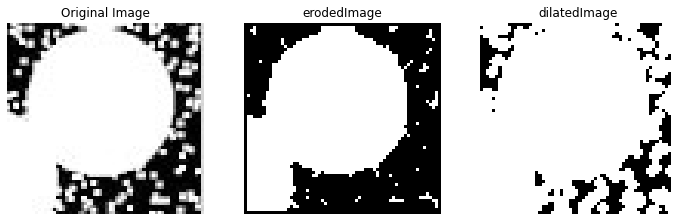

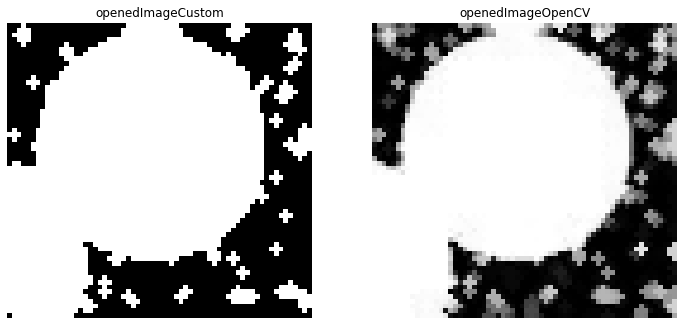

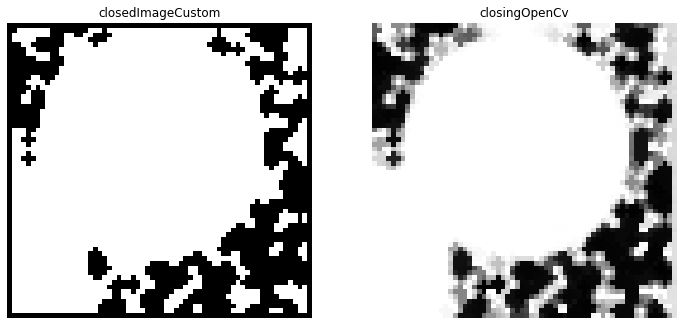

In [2]:
def toGreyScale(image):
        if len(image.shape) != 3:
            print("input image must be a 3D color image.")
            return
        if image.shape[2] != 3:
            print("input image must have 3 channels (RGB).")
            return
        grayscaleImage = 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]
        return grayscaleImage.astype(np.uint8)

file_path = "C:/Users/hassa/Downloads/check.jpg"
orgImage = mpimg.imread(file_path)

def erosion(image, kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])):
    image = toGreyScale(image)
    image = np.array(image)
    image = np.where(image > 127, 1, 0)
    erodedImage = np.zeros_like(image)
    kernelHeight, kernelWidth = kernel.shape
    padding = ((3 // 2, 3 // 2),)
    paddedImage = np.pad(image, padding, mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.array_equal(paddedImage[i:i+kernelHeight, j:j+kernelWidth] * kernel, kernel):
                erodedImage[i, j] = 1
    return erodedImage

def dilation(image, kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])):
    image = toGreyScale(image)
    image = np.array(image)
    image = np.where(image > 127, 1, 0)
    dilatedImage = np.zeros_like(image)
    kernelHeight, kernelWidth = kernel.shape
    padding = ((3 // 2, 3 // 2),)
    paddedImage = np.pad(image, padding, mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.any(paddedImage[i:i+kernelHeight, j:j+kernelWidth] * kernel):
                dilatedImage[i, j] = 1
    return dilatedImage

def opening(image, kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])):
    image = erosion(image)
    openedImage = np.zeros_like(image)
    kernelHeight, kernelWidth = kernel.shape
    padding = ((3 // 2, 3 // 2),)
    paddedImage = np.pad(image, padding, mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.any(paddedImage[i:i+kernelHeight, j:j+kernelWidth] * kernel):
                openedImage[i, j] = 1
    return openedImage

def closing(image, kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]])):
    image = dilation(image)
    closedImage = np.zeros_like(image)
    kernelHeight, kernelWidth = kernel.shape
    padding = ((3 // 2, 3 // 2),)
    paddedImage = np.pad(image, padding, mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if np.array_equal(paddedImage[i:i+kernelHeight, j:j+kernelWidth] * kernel, kernel):
                closedImage[i, j] = 1
    return closedImage

erodedImage = erosion(orgImage)
dilatedImage = dilation(orgImage)
openedImageCustom = opening(orgImage)
closedImageCustom = closing(orgImage)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(orgImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(erodedImage, cmap='gray')
plt.title('erodedImage')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilatedImage, cmap='gray')
plt.title('dilatedImage')
plt.axis('off')

plt.show()

image = cv2.imread('C:/Users/hassa/Downloads/check.jpg', 0) 
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], np.uint8)
openingOpenCv = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
closingOpenCv = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(openedImageCustom, cmap='gray')
plt.title('openedImageCustom')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(openingOpenCv, cmap='gray')
plt.title('openedImageOpenCV')
plt.axis('off')

plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(closedImageCustom, cmap='gray')
plt.title('closedImageCustom')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(closingOpenCv, cmap='gray')
plt.title('closingOpenCv')
plt.axis('off')

plt.show()


# Image Compression

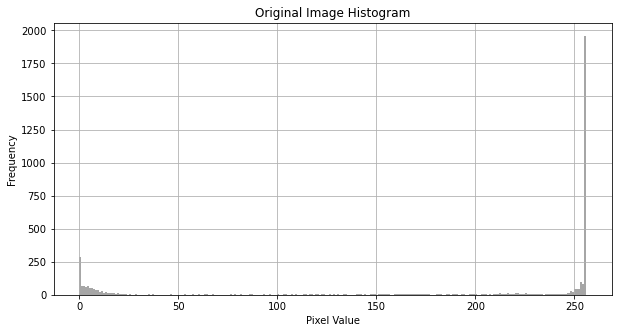

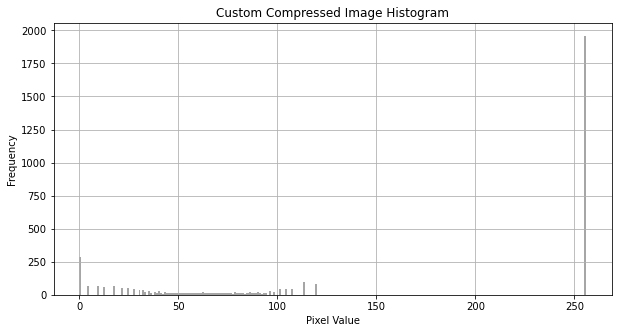

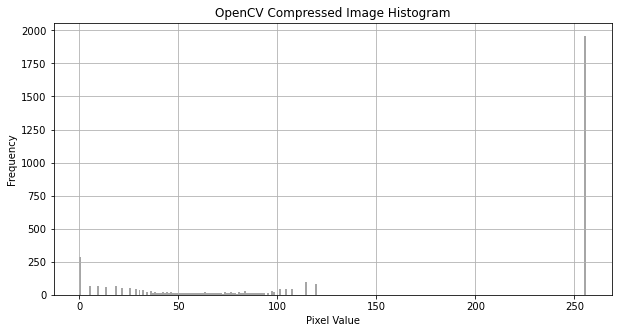

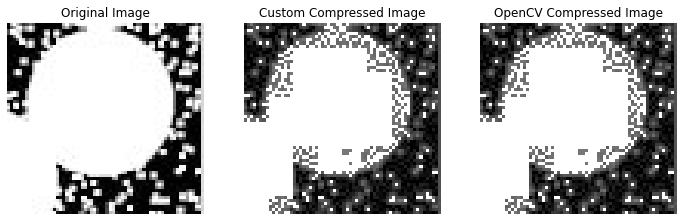

In [3]:
def compressImage(image, bins=256):
    hist, _ = np.histogram(image.flatten(), bins=bins, range=(0, 256)) #histogram of original image    
    cdf = hist.cumsum()#cumulative distribution function (CDF) of the histogram
    cdfNormalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())#normalize CDF to range 0, 255
    compressedImage = np.interp(image.flatten(), range(256), cdfNormalized).astype(np.uint8)#interpolate the CDF to get new pixel values
    compressedImage = compressedImage.reshape(image.shape)#reshape back to original image shape
    return compressedImage

def plotHistogram(image, title):
    plt.figure(figsize=(10, 5))
    plt.hist(image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

image = plt.imread('C:/Users/hassa/Downloads/check.jpg')
grayscaleImage = np.mean(image, axis=2).astype(np.uint8)
compressedCustom = compressImage(grayscaleImage)#compress image

#histograms
plotHistogram(grayscaleImage, 'Original Image Histogram')
plotHistogram(compressedCustom, 'Custom Compressed Image Histogram')

equalizedOpencv = cv2.equalizeHist(grayscaleImage)# apply histogram equalization using OpenCV
plotHistogram(equalizedOpencv, 'OpenCV Compressed Image Histogram')

#original and compressed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(grayscaleImage, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(compressedCustom, cmap='gray')
plt.title('Custom Compressed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(equalizedOpencv, cmap='gray')
plt.title('OpenCV Compressed Image')
plt.axis('off')

plt.show()


---

**Note:** We have tried our best to provide accurate results in this notebook. However, these results may not be entirely accurate, and contributions or corrections are encouraged. Thank you!
